# Read annotation from VGG Image Annotator (VIA)

http://www.robots.ox.ac.uk/~vgg/software/via/

In [39]:
%pylab inline
import pandas as pd
from pathlib import Path
import json
import io3d # just to have paths to usual location of my datasets
csv_path = Path(io3d.datasets.join_path("medical/orig/GBM/via_export_csv.csv", get_root=True ))
dataset_path = csv_path.parent
print(csv_path)
print(dataset_path)
df = pd.read_csv(csv_path)

2020-04-06 15:18:22.627 | DEBUG    | io3d.cachefile:__init__:26 - cache filename: ~/.io3d_cache.yaml
2020-04-06 15:18:22.630 | DEBUG    | io3d.datasets:dataset_path:394 - checking for key local_dataset_specific_dir_.
2020-04-06 15:18:22.632 | DEBUG    | io3d.datasets:dataset_path:394 - checking for key local_dataset_specific_dir_medical
2020-04-06 15:18:22.634 | DEBUG    | io3d.datasets:dataset_path:394 - checking for key local_dataset_specific_dir_medical/orig
2020-04-06 15:18:22.635 | DEBUG    | io3d.datasets:dataset_path:394 - checking for key local_dataset_specific_dir_medical/orig/GBM
2020-04-06 15:18:22.638 | DEBUG    | io3d.datasets:dataset_path:398 - found value g:/Můj disk/data/medical/orig/GBM
2020-04-06 15:18:22.639 | DEBUG    | io3d.datasets:join_path:304 - sample_data_pathg:/Můj disk/data/medical/orig/GBM
2020-04-06 15:18:22.640 | DEBUG    | io3d.datasets:join_path:305 - path g:\Můj disk\data\medical\orig\GBM\via_export_csv.csv


Populating the interactive namespace from numpy and matplotlib
g:\Můj disk\data\medical\orig\GBM\via_export_csv.csv
g:\Můj disk\data\medical\orig\GBM


In [28]:
df

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,Ma306-2-27.jpg,2997996,{},4,0,"{""name"":""polygon"",""all_points_x"":[15,94,164,18...",{}
1,Ma306-2-27.jpg,2997996,{},4,1,"{""name"":""polygon"",""all_points_x"":[4081,4021,38...",{}
2,Ma306-2-27.jpg,2997996,{},4,2,"{""name"":""polygon"",""all_points_x"":[169,298,288,...",{}
3,Ma306-2-27.jpg,2997996,{},4,3,"{""name"":""polygon"",""all_points_x"":[5,5,99,254,3...",{}
4,Ma306-2-29.jpg,3166428,{},0,0,{},{}
5,Ma309-2-06.jpg,3094393,{},0,0,{},{}
6,Ma309-2-53.jpg,2901523,{},0,0,{},{}
7,Ma311-2-12.jpg,2850221,{},0,0,{},{}
8,Ma312-1-06.jpg,3001168,{},0,0,{},{}
9,Ma312-1-36.jpg,2882970,{},0,0,{},{}


In [29]:
fn = 'Ma306-2-27.jpg'
df[df["filename"] == fn].region_shape_attributes

0    {"name":"polygon","all_points_x":[15,94,164,18...
1    {"name":"polygon","all_points_x":[4081,4021,38...
2    {"name":"polygon","all_points_x":[169,298,288,...
3    {"name":"polygon","all_points_x":[5,5,99,254,3...
Name: region_shape_attributes, dtype: object

# Draw annotation

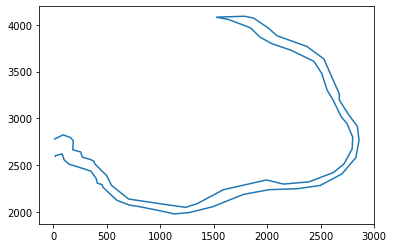

In [40]:
annotation_id = 0

region_shape_attributes = json.loads(
    df[df["filename"] == fn].region_shape_attributes[annotation_id]
)

plot(region_shape_attributes["all_points_x"],region_shape_attributes["all_points_y"])

# Draw into image

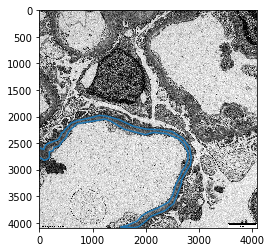

In [58]:
import skimage.io
fn_full = dataset_path / f"GBM_measurement_3000x_2020-04-03/{fn}"
img = skimage.io.imread(fn_full, as_gray=True)
plt.imshow(img, cmap="gray")
polygon_x = region_shape_attributes["all_points_x"]
polygon_y = region_shape_attributes["all_points_y"]
plot(polygon_x, polygon_y)



# Get binar mask

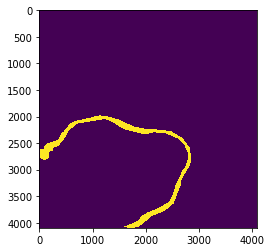

In [49]:
from matplotlib.path import Path as mplPath
polygon = list(zip(polygon_y, polygon_x))
poly_path = mplPath(polygon)

# coordinates are swapped also here
# x, y = np.mgrid[: self.region_size_on_level[1], : self.region_size_on_level[0]]
x, y = np.mgrid[
    : img.shape[0], :img.shape[1]
]
coors = np.hstack(
    (x.reshape(-1, 1), y.reshape(-1, 1))
)  # coors.shape is (4000000,2)

mask = poly_path.contains_points(coors)
mask = mask.reshape(img.shape[:-1])
plt.imshow(mask)

In [67]:
mask.dtype

dtype('bool')

# Segmentation

## Threshold

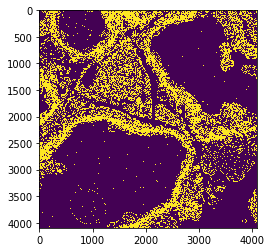

In [101]:
seg_thr = (0.2 < img) & (img < 0.5)
# print(seg.shape, seg.dtype)
plt.imshow(seg_thr)

## Stupid random

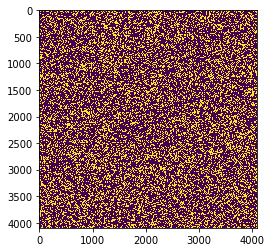

In [102]:
seg_rnd = np.random.rand(*img.shape) > 0.7
plt.imshow(seg_rnd)

# Evaluation with Jaccard (intersection over union)


https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/



In [103]:
import sklearn.metrics
print(sklearn.metrics.jaccard_score(mask.ravel(), seg_thr.ravel()))
print(sklearn.metrics.jaccard_score(mask.ravel(), seg_rnd.ravel()))

0.08551974054497324
0.025562803855426367


In [106]:
p = {"a":0}
p.get("a")

0